### 1) Import libraries


In [64]:
# import important modules

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from string import punctuation 
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('white')



In [65]:
# text preprocessing modules

import re 
import nltk 
import spacy
import string
import itertools
import contractions
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



from nltk.tokenize import word_tokenize
from cleantext import clean

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression


from wordcloud import WordCloud, STOPWORDS

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
    "stopwords"
):
    nltk.download(dependency)

#nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\amr_a\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to

### 2) Data Loading

In [66]:
# Read the dataset from csv file
df = pd.read_csv("../Data/spam.csv", encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
# check the shape
df.shape

(5572, 5)

In [68]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [69]:
# check missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [70]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [71]:
df.rename(columns={'v1': 'class', 'v2': 'Message'}, inplace=True)
df.head()

,class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
# evalute class distribution
df["class"].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [73]:
for row in df.head(10).iterrows():
    print(row[1]['Message'] +', '+  row[1]['class']) 

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..., ham
Ok lar... Joking wif u oni..., ham
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's, spam
U dun say so early hor... U c already then say..., ham
Nah I don't think he goes to usf, he lives around here though, ham
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv, spam
Even my brother is not like to speak with me. They treat me like aids patent., ham
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune, ham
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only., 

### 3) EDA

As from continuosly performing EDA it leads to start thinking about the features we are going to be using.Here comes the general idea of feature engineering comes. The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

Let's make a new column to detect how long the text messages are:

In [74]:
# Find all category
classes = list(df['class'].unique())
classes

['ham', 'spam']

In [75]:
clas = df.groupby('class')
print("Train Total Categories:", clas.ngroups)
print(clas.size())

Train Total Categories: 2
class
ham     4825
spam     747
dtype: int64


In [85]:
df['Length'] = df['Message'].apply(len)

KeyError: 'Message'

In [76]:
# Check null values
df.isnull().sum()

class      0
Message    0
dtype: int64

In [77]:
df.duplicated().sum()

403

In [78]:
df.drop_duplicates(inplace=True)

### 4. Visualizationm

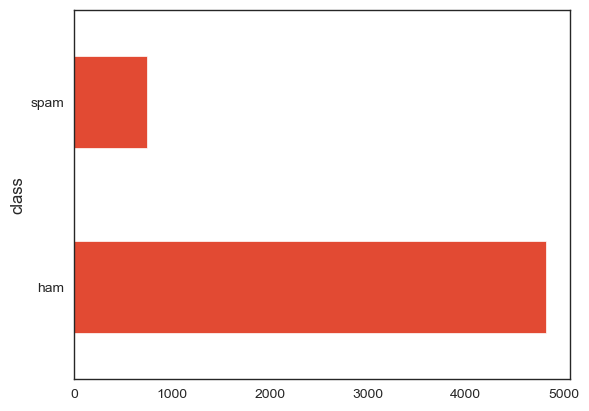

In [79]:
clas.size().plot(kind='barh')
plt.show();

<AxesSubplot:ylabel='class'>

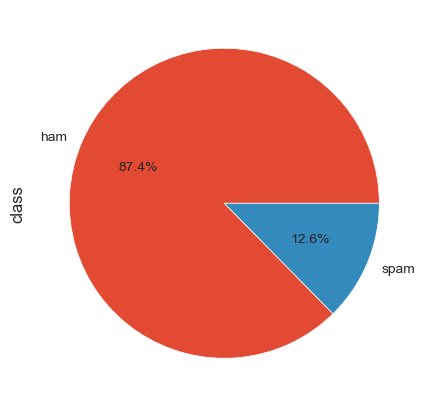

In [80]:
labels = classes

fig, ax = plt.subplots(1, 1, figsize=(5,10))
df['class'].value_counts().plot.pie(autopct = '%1.1f%%', labels=labels)

###### Cleaning

In [81]:
stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"ur", " your ", text)
    text = re.sub(r" nd "," and ",text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" tkts "," tickets ",text)
    text = re.sub(r" c "," can ",text)
    text = re.sub(r" e g ", " eg ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase 
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    #clean message from punctuations
    def cleanMessage(message):
        nonPunc = [char for char in message if char not in string.punctuation]
        nonPunc = "".join(nonPunc)
        return nonPunc
    
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)


#clean the dataset 
df["clean_message"] = df["Message"].apply(text_cleaning)

In [82]:
df.drop('Message', axis = 1, inplace = True)

### 6 ) Saving datasets obtained from preprocessing.

In [83]:
df.to_csv(r'../Data/cleaned_spam.csv', index = False)